In [1]:
# Library Version check-in
import sys, numpy, scipy, pandas as pd, matplotlib, sklearn, seaborn as sns

In [2]:
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
scipy: 1.13.0
numpy: 1.26.4
pandas: 2.2.1
sklearn: 1.4.2
matplotlib: 3.8.4
Seaborn: 0.12.2


# No Warnings

In [3]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

# Import Library

In [4]:
# Loading required Libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
# Data is Here
# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# column names for the dataset
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# feeding the data with pandas, giving column names to dataset. 
dataset = pd.read_csv(url, names= names)

In [6]:
# Data Exploration
# Peak at Data
# Peak at the data
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# dimensions of the dataset
r, c = dataset.shape
print('This dataset has ',r,' rows and ' ,c,' columns.')

This dataset has  150  rows and  5  columns.


In [8]:
# Grouping by Class
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Statistical Summary

In [9]:
# Statistical Summary
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

## Univariate Plots

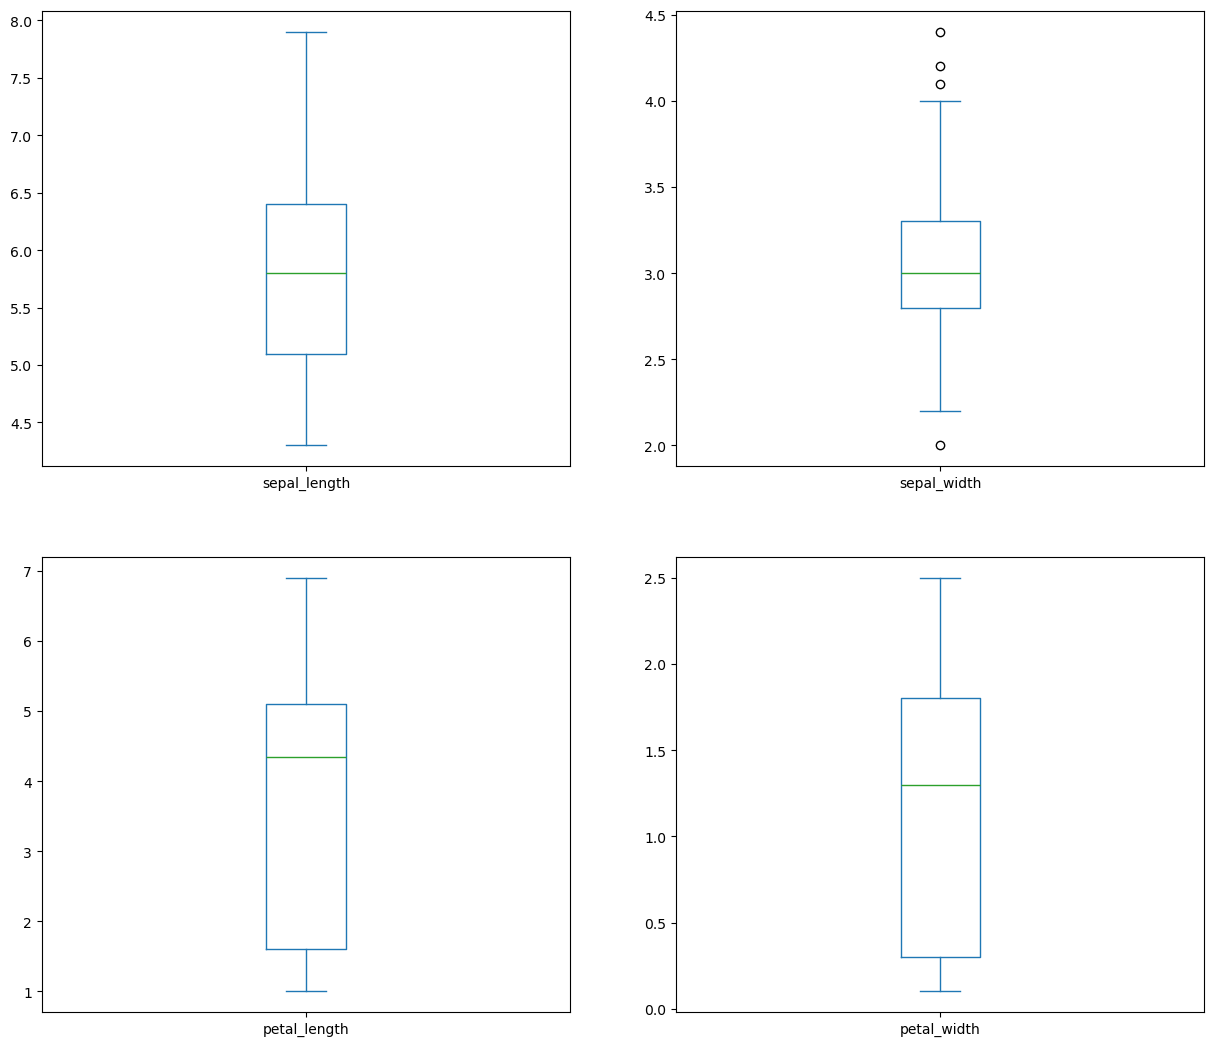

In [10]:
# Univariate plots to better understand each attribute.

# plotting each variable
# box and whiskers plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(15,13))
plt.show()

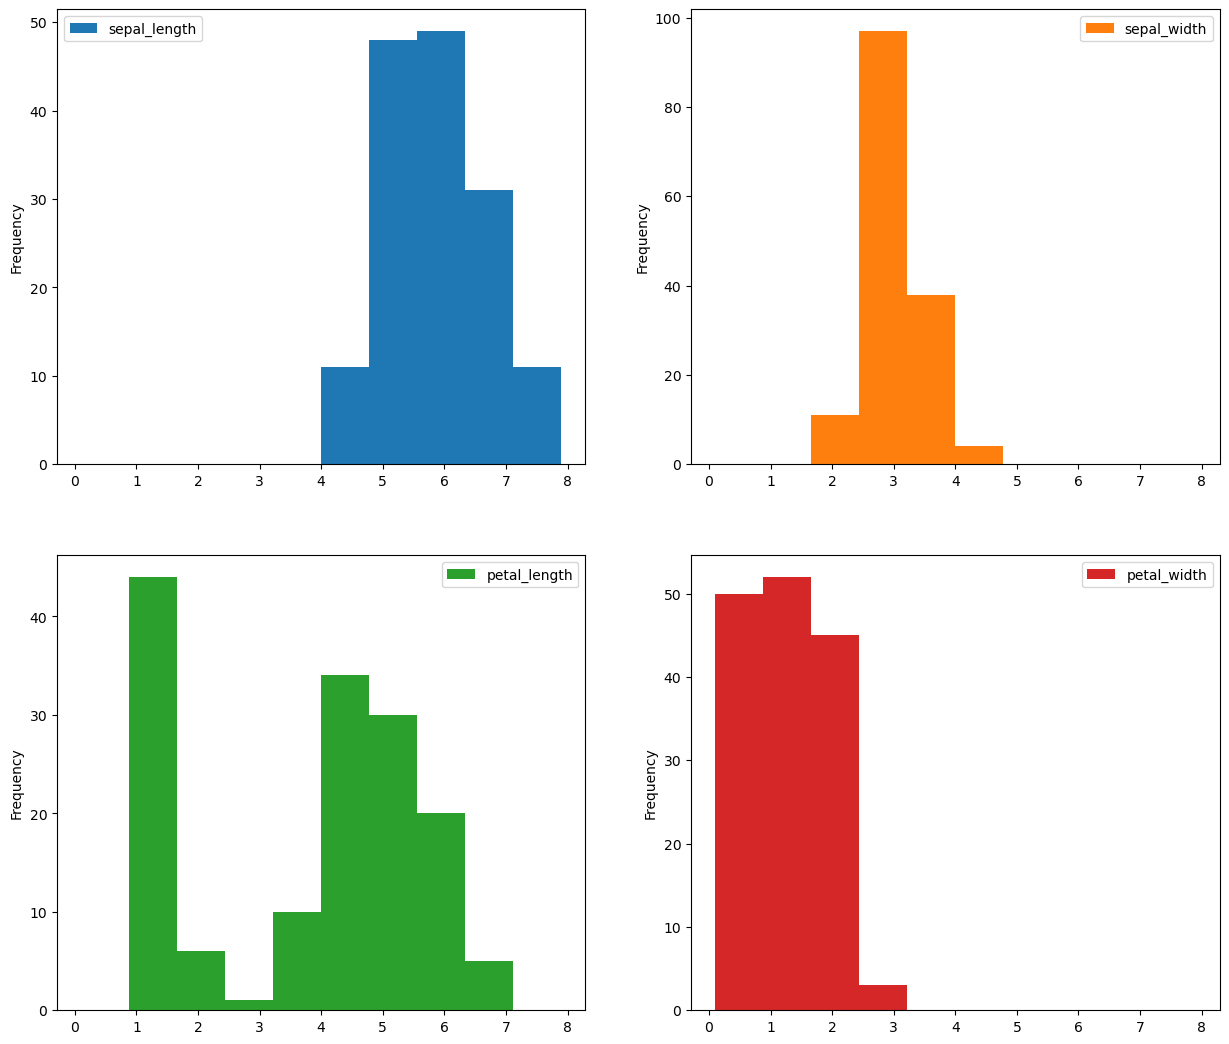

In [13]:
dataset.plot(kind='hist', subplots=True, layout = (2,2), sharex=False, sharey=False, figsize=(15,13))
plt.show()

# Multivariate Plots

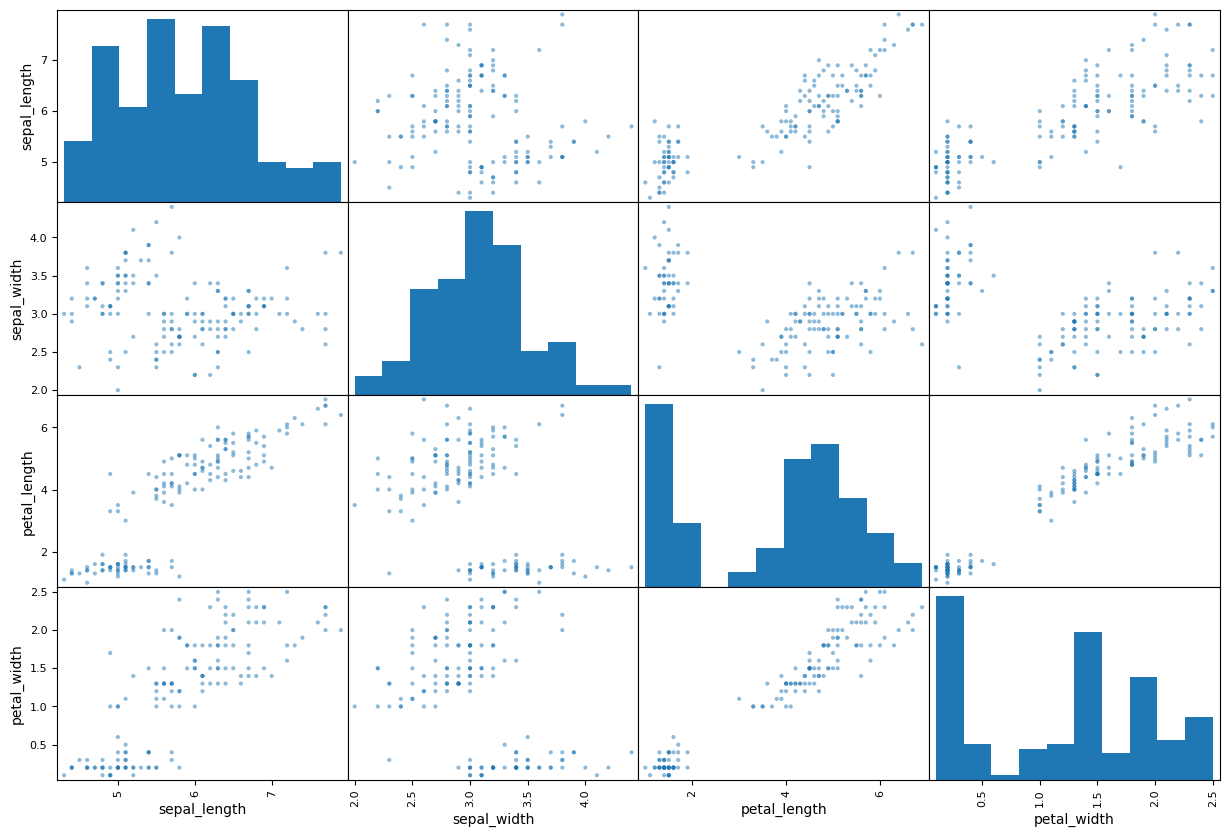

In [12]:
# Multivariate plots to better understand the relationships between attributes.

scatter_matrix(dataset, figsize=(15,10))
plt.show()

# Evaluate Algorithms

In [14]:
# Describe the tools and techniques you will use necessary for a model to make a prediction

## Create a Validation Dataset

In [15]:
# # 80-20 train-test-split
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
test = 0.2
seed = 53
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = seed)
scoring = 'accuracy'

In [ ]:
# We are using the metric of ‘accuracy‘ to evaluate models. 
# This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 
# We will be using the scoring variable when we run build and evaluate each model next.


## Developing Model

In [ ]:
We'll evaluate these 6 algorithms:

Logistic Regression (LR)
Linear Discriminate Analysis (LDA)
K-Nearest Neighbours (KNN)
Classification and Regression Trees (CRT)
Guassian Naive Bayes (GNN)
Support Vector Machine (SVM)


This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CRT, NB and SVM) algorithms. 
We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. 
It ensures the results are directly comparable.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CRT', DecisionTreeClassifier()))
models.append(('GNN', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [18]:
# Now evaluating each model
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

# looping models in the list
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(name, ': ', cv_results.mean(), cv_results.std())

LR :  0.9833333333333332 0.03333333333333335
LDA :  0.9833333333333332 0.03333333333333335
KNN :  0.9583333333333333 0.04166666666666669
CRT :  0.9666666666666666 0.055277079839256664
GNN :  0.95 0.055277079839256664
SVM :  0.975 0.03818813079129868
RF :  0.975 0.03818813079129868


# Dimentionality Reduction

## ETC

In [19]:
# importing model for feature importance
from sklearn.ensemble import ExtraTreesClassifier

# passing the model
model = ExtraTreesClassifier(random_state = 53)

X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, -1:]

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

# removing traces of this model
model = None

# results
ETC_feature_importances

,ETC
petal_width,0.414580
petal_length,0.401418
sepal_length,0.121449
sepal_width,0.062553


## RFC

In [20]:
# passing the model
model = RandomForestClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
RFC_feature_importances

,RFC
petal_length,0.434537
petal_width,0.431443
sepal_length,0.105823
sepal_width,0.028197


## ADBC

In [21]:
# importing model for feature importance
from sklearn.ensemble import AdaBoostClassifier

# passing the model
model = AdaBoostClassifier(random_state = 53)

model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

# removing traces of this model
model = None

ADB_feature_importances

,ADB
petal_length,0.54
petal_width,0.46
sepal_length,0.00
sepal_width,0.00


## GBC

In [22]:
# importing model for feature importance
from sklearn.ensemble import GradientBoostingClassifier

# passing the model
model = GradientBoostingClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
GBC_feature_importances.head(10)

,GBC
petal_width,0.809485
petal_length,0.173771
sepal_width,0.010275
sepal_length,0.006469


## Select K Best Classifier

In [23]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(k = 3).fit(X,y)
mask = kbest.get_support()
new_features = X.columns[mask]

new_features

Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')

## Make Prediction

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lda =  DecisionTreeClassifier()

lda.fit(X_train, y_train)

predict = lda.predict(X_test)

print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

lda = None

0.9333333333333333
[[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

